### Basic rules:
1. Cannot overwrite existing symbol<br>
2. Cannot write if array/grid full<br>
3. X is denoted by 1, O denoted by 0, blank denoted by 2


### Win Rules:
1. Win if any 1 col or 1 row or 1 diagonal filled with same symbol<br>
2. else draw

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

In [2]:
arr=np.zeros((3,3),dtype='uint8')
arr.fill(2)
print(arr)

img=np.zeros((11,11,3),dtype='uint8')

[[2 2 2]
 [2 2 2]
 [2 2 2]]


In [18]:
cross_col=(153, 204, 0) #
circle_col=(255, 0, 102) #
border_col=(51, 26, 0) #
base_col=(255, 255, 230) #

In [4]:
def create_cross(start):
    a=3*start[0]+start[0]
    b=3*start[1]+start[1]
    img[a,b]=cross_col
    img[a+1,b+1]=cross_col
    img[a+2,b+2]=cross_col
    img[a,b+2]=cross_col
    img[a+2,b]=cross_col

In [5]:
def create_circle(start):
    a=3*start[0]+start[0]
    b=3*start[1]+start[1]
    img[a,b]=circle_col
    img[a,b+1]=circle_col
    img[a,b+2]=circle_col
    img[a+1,b]=circle_col
    img[a+2,b]=circle_col
    img[a+2,b+1]=circle_col
    img[a+2,b+2]=circle_col
    img[a+1,b+2]=circle_col

In [6]:
def comp_win():
    #if any row or any col or any diagonal completely O
    diag1={arr[0,0],arr[1,1],arr[2,2]}
    diag2={arr[0,2],arr[1,1],arr[2,0]}
    for i in range(3):
        if (2 not in arr[i]) and set(arr[i])=={1}:
            return True
        if (2 not in arr[:,i]) and set(arr[:,i])=={1}:
            return True
    
    if (2 not in diag1) and diag1=={1}:
        return True
    
    if (2 not in diag2) and diag2=={1}:
        return True
    
    return False

In [7]:
def human_win():
    #if any row or any col or any diagonal completely O
    diag1={arr[0,0],arr[1,1],arr[2,2]}
    diag2={arr[0,2],arr[1,1],arr[2,0]}
    for i in range(3):
        if (2 not in arr[i]) and set(arr[i])=={0}:
            return True
        if (2 not in arr[:,i]) and set(arr[:,i])=={0}:
            return True
    
    if (2 not in diag1) and diag1=={0}:
        return True
    
    if (2 not in diag2) and diag2=={0}:
        return True
    
    return False

In [8]:
def empty_pos(arr):
    temp=[]
    for i in range(3):
            for j in range(3):
                if arr[i,j]!=0 and arr[i,j]!=1:
                    temp.append([i,j])
    return temp

In [9]:
def find_score(newtemp):
    #score will store the maximum damage that O(human) can do
    min=9999
    score=0
    for i in newtemp:
        copy=arr[i[0],i[1]]
        arr[i[0],i[1]]=0
        if human_win()==True:
            score=-999 #Very large -ve number ie. most damage
            arr[i[0],i[1]]=copy
            return score
        countx=0
        counto=0
        
        #calculating the damage(heuristic)
        for j in range(3):
            if 0 not in set(arr[j]):
                countx+=1
            if 1 not in set(arr[j]):
                counto+=1
            if 0 not in set(arr[:,j]):
                countx+=1
            if 1 not in set(arr[:,j]):
                counto+=1
        diag1={arr[0,0],arr[1,1],arr[2,2]}
        diag2={arr[0,2],arr[1,1],arr[2,0]}
        if 0 not in diag1:
            countx+=1
        if 0 not in diag2:
            countx+=1
        if 1 not in diag1:
            counto+=1
        if 1 not in diag2:
            counto+=1
            
        diff=countx-counto
        if diff<min:
            min=diff
        arr[i[0],i[1]]=copy
    score=min    
    return score

In [10]:
def intelligent_move(temp):
    #max will store highest score for X(computer)
    #bestpos will store next best move for X(computer)
    max=-9999
    bestpos=0
    new_temp=[]
    
    #looping through the empty positions for X move
    for i in range(len(temp)):
        copy=arr[temp[i][0],temp[i][1]]
        arr[temp[i][0],temp[i][1]]=1

        if comp_win()==True:
            return i
            
        #score calculated by going 1 step down to O(Human) moves
        #current empty position filled by X so omit that position
        new_temp=temp[0:i]+temp[i+1:len(temp)]
        #print('This enters find_score:',new_temp,)
        score=find_score(new_temp)
        #print(' Score:',score)
        
        if score>max:
            max=score
            bestpos=i
        
        arr[temp[i][0],temp[i][1]]=copy
            
    return bestpos

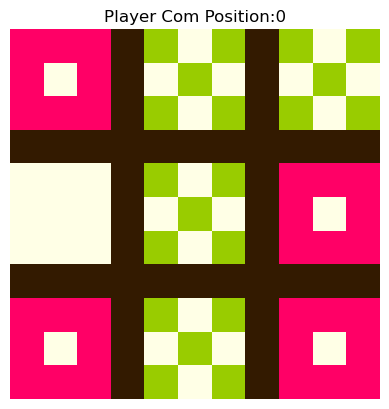

Player Com  WON!!


In [19]:
for i in range(11):
    for j in range(11):
        img[i,j,:]=base_col
        
for i in range(3,8,4):
    img[i,:,:]=border_col
    img[:,i,:]=border_col

arr.fill(2)
turn=1
flag=False
players={1: 'Player Com',
         0: 'Player Human'}


while(True):
    #print(arr)
    turn=abs(turn-1)
    if turn==0:
        pos=int(input('Enter Position:'))-1
            
        posi=pos//3
        posj=pos%3

        clear_output(wait=True)
        arr[posi,posj]=turn
        create_circle([posi,posj])
    else:
        temp=empty_pos(arr)
                
        if len(temp)==0:
            break
  
        pos=intelligent_move(temp) #bestpos
        #print(pos)
    
        arr[temp[pos][0],temp[pos][1]]=turn

        create_cross(temp[pos])
    
    if turn==1:
        plt.title(f'{players[turn]} Position:{pos}')
    else:
        plt.title(f'{players[turn]} Position:{[posi,posj]}')
    plt.axis('off')
    plt.imshow(img)
    plt.show()
        
    if human_win()==True or comp_win()==True:
        flag=True
        print(players[turn],' WON!!')
        break
            
    clear_output(wait=True)
    time.sleep(2)

if flag==False:
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    print('DRAW!!!')
    